In [9]:
!pip install scprep
!pip install umap-learn magic-impute


In [10]:
import urllib.request
import os

# URL del archivo CSV comprimido
url = "https://github.com/KrishnaswamyLab/MAGIC/blob/3a4ffdbe435716bb3b2fbe78f434c6cdc8dd8d78/data/HMLE_TGFb_day_8_10.csv.gz?raw=true"

# Nombre del archivo destino
file_name = "HMLE_TGFb_day_8_10.csv.gz"

# Directorio de descarga en Google Colab
download_dir = "/content/"

# Descarga el archivo
urllib.request.urlretrieve(url, os.path.join(download_dir, file_name))

print("Descarga completada.")
print("El archivo se encuentra en:", download_dir)


Descarga completada.
El archivo se encuentra en: /content/


In [11]:
import scprep

In [12]:
emt_data = scprep.io.load_csv('HMLE_TGFb_day_8_10.csv.gz', cell_names=False)
emt_data.head()

,5S_rRNA,5_8S_rRNA,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,...,bP-2171C21.6,chr22-38_28785274-29006793.1,pk,snoU109,snoU13,snoU2-30,snoU2_19,snoZ196,uc_338,yR211F11.2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/scprep/plot/histogram.py:180: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axvline(cutoff, color="red")


<Axes: xlabel='Library size', ylabel='Number of cells'>

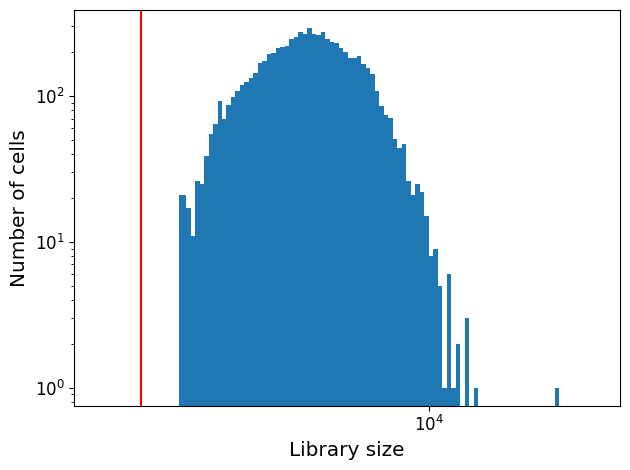

In [13]:
scprep.plot.plot_library_size(emt_data, cutoff=1500)

In [14]:
emt_data = scprep.normalize.library_size_normalize(emt_data)
emt_data = scprep.filter.filter_library_size(emt_data, cutoff=1500)
#emt_data = scprep.transform.sqrt(emt_data)
emt_data.head()

,5S_rRNA,5_8S_rRNA,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,...,bP-2171C21.6,chr22-38_28785274-29006793.1,pk,snoU109,snoU13,snoU2-30,snoU2_19,snoZ196,uc_338,yR211F11.2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,3.186743,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.131851,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
url_sc_phenix = 'https://raw.githubusercontent.com/resendislab/sc-PHENIX/main/sc-PHENIX%20tutorial%20colab/sc_PHENIX.py'
urllib.request.urlretrieve(url_sc_phenix, 'sc_PHENIX.py')
os.listdir()
!cd /content
!ls

HMLE_TGFb_day_8_10.csv.gz  sample_data	sc_PHENIX.py


In [16]:
import pandas as pd
from sklearn.decomposition import PCA

# Suponiendo que ya tienes cargados tus datos en emt_data
# Inicializar PCA con 20 componentes
pca_data = PCA(n_components=20, random_state=1)



# Ajustar PCA a tus datos
X_pca = pca_data.fit_transform(emt_data)

In [17]:
from sc_PHENIX import sc_PHENIX
emt_sc_phenix_PCA = sc_PHENIX(emt_data ,X_pca,t=6,knn=30,decay=15)


calculando distancias
(7523, 7523)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May  6 00:19:09 2024


In [18]:
emt_sc_phenix_PCA

,5S_rRNA,5_8S_rRNA,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,...,bP-2171C21.6,chr22-38_28785274-29006793.1,pk,snoU109,snoU13,snoU2-30,snoU2_19,snoZ196,uc_338,yR211F11.2
0,5.498765e-05,2.031314e-04,0.002193,0.064816,8.788350e-06,6.375861e-08,0.019724,4.179879e-07,0.027646,0.312810,...,0.000021,0.591691,2.801874,0.005687,0.011643,0.000423,0.004994,6.050725e-05,0.051095,7.512518e-07
1,1.961897e-06,5.069872e-05,0.002421,0.067706,3.178118e-05,7.160268e-06,0.021284,1.917652e-06,0.016418,0.321314,...,0.000002,0.557904,2.740624,0.000658,0.024409,0.000024,0.003960,1.311765e-07,0.032319,6.135827e-07
2,5.141010e-05,1.276341e-04,0.002309,0.065357,4.502722e-06,2.282206e-07,0.018962,1.417731e-06,0.030853,0.316708,...,0.000082,0.575513,2.806940,0.007555,0.011203,0.000510,0.004787,1.616755e-04,0.053961,4.589944e-06
3,9.705126e-07,1.147573e-07,0.003712,0.072739,2.681146e-06,1.464111e-03,0.050801,7.107424e-04,0.038658,0.221760,...,0.000280,0.541753,2.750828,0.001338,0.008563,0.000147,0.003730,2.317148e-05,0.023211,5.031931e-04
4,1.569628e-05,1.669825e-04,0.002033,0.064851,3.738108e-06,1.784460e-08,0.015266,8.132257e-08,0.021627,0.318814,...,0.000018,0.603915,2.769499,0.005913,0.010787,0.000244,0.007531,6.811920e-05,0.045883,1.234028e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,3.432094e-07,2.028241e-08,0.008878,0.067042,9.018955e-08,7.676909e-06,0.016620,1.311012e-05,0.027852,0.276397,...,0.001698,0.552628,2.632488,0.000265,0.003758,0.000042,0.005806,7.690200e-04,0.039656,1.049515e-03
7519,2.380098e-04,1.591857e-04,0.005067,0.063627,1.018627e-05,1.264099e-07,0.027505,2.952782e-06,0.035454,0.283628,...,0.000142,0.515399,2.875028,0.005629,0.011305,0.000438,0.002059,2.121746e-04,0.053191,1.470072e-05
7520,1.167993e-05,5.581576e-05,0.001509,0.065982,7.428437e-08,3.242644e-09,0.008089,3.215128e-08,0.029821,0.348046,...,0.000135,0.562442,2.790461,0.004918,0.009019,0.000888,0.007219,7.968627e-04,0.064612,9.648207e-06
7521,8.130550e-06,4.418062e-06,0.004404,0.076321,1.201429e-04,6.574140e-05,0.046802,1.378042e-04,0.045733,0.248937,...,0.000015,0.569639,2.814637,0.003782,0.012507,0.000153,0.002621,1.540020e-06,0.036443,3.821471e-06


In [19]:
import magic
magic_op = magic.MAGIC(knn=30,
    knn_max=None,
    decay=15,
    t=6,
    n_pca=20,
    solver='exact',
    knn_dist='euclidean',
    n_jobs=1,
    random_state=1,
    verbose=1,
    #k=None, #New version does not have this parameters anymore
    #a=None,
    )
emt_magic = magic_op.fit_transform(emt_data)
emt_magic

Calculating MAGIC...
  Running MAGIC on 7523 cells and 28910 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.67 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.26 seconds.
    Calculating affinities...
    Calculated affinities in 1.88 seconds.
  Calculated graph and diffusion operator in 13.51 seconds.
  Running MAGIC with `solver='exact'` on 28910-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 46.69 seconds.
Calculated MAGIC in 60.76 seconds.


,5S_rRNA,5_8S_rRNA,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,...,bP-2171C21.6,chr22-38_28785274-29006793.1,pk,snoU109,snoU13,snoU2-30,snoU2_19,snoZ196,uc_338,yR211F11.2
0,5.428956e-05,2.027605e-04,0.002179,0.064848,8.422954e-06,5.205373e-08,0.019538,3.707198e-07,0.027546,0.313158,...,0.000019,0.592182,2.801635,0.005663,0.011626,0.000423,0.005026,5.926208e-05,0.051073,6.353438e-07
1,1.912203e-06,5.051027e-05,0.002423,0.067695,3.155703e-05,7.070178e-06,0.021221,1.868530e-06,0.016390,0.321567,...,0.000001,0.558128,2.740291,0.000652,0.024461,0.000024,0.003965,1.190234e-07,0.032312,5.858577e-07
2,4.938409e-05,1.266781e-04,0.002296,0.065392,4.167882e-06,1.931634e-07,0.018483,1.344040e-06,0.030668,0.317257,...,0.000074,0.575911,2.807193,0.007587,0.011208,0.000509,0.004811,1.568310e-04,0.053932,3.910904e-06
3,9.232262e-07,9.477745e-08,0.003700,0.072766,2.533329e-06,1.472174e-03,0.050978,7.165398e-04,0.038793,0.221475,...,0.000276,0.541933,2.750815,0.001345,0.008577,0.000146,0.003737,2.287392e-05,0.023129,4.958996e-04
4,1.540940e-05,1.668997e-04,0.002029,0.064876,3.665616e-06,1.600617e-08,0.015212,7.560541e-08,0.021564,0.319043,...,0.000015,0.604370,2.769075,0.005926,0.010775,0.000242,0.007576,6.650916e-05,0.045809,1.124172e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,3.140493e-07,1.663689e-08,0.008916,0.067078,8.128883e-08,7.270392e-06,0.016569,1.295696e-05,0.027822,0.276473,...,0.001650,0.553180,2.631307,0.000262,0.003738,0.000041,0.005814,7.684294e-04,0.039623,1.035794e-03
7519,2.350777e-04,1.574275e-04,0.005086,0.063672,9.976505e-06,9.813349e-08,0.027233,2.772987e-06,0.035383,0.283586,...,0.000134,0.515112,2.875876,0.005614,0.011297,0.000436,0.002050,2.103470e-04,0.053189,1.408108e-05
7520,1.135892e-05,5.533592e-05,0.001500,0.065997,6.581304e-08,2.707706e-09,0.007999,2.982044e-08,0.029835,0.348643,...,0.000122,0.562730,2.790151,0.004930,0.009011,0.000891,0.007258,7.968063e-04,0.064693,9.155167e-06
7521,7.803076e-06,4.323243e-06,0.004377,0.076367,1.198078e-04,6.549063e-05,0.046711,1.375178e-04,0.045772,0.248996,...,0.000013,0.570237,2.814456,0.003780,0.012542,0.000152,0.002620,1.378973e-06,0.036475,3.532623e-06


In [20]:
emt_magic

,5S_rRNA,5_8S_rRNA,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,...,bP-2171C21.6,chr22-38_28785274-29006793.1,pk,snoU109,snoU13,snoU2-30,snoU2_19,snoZ196,uc_338,yR211F11.2
0,5.428956e-05,2.027605e-04,0.002179,0.064848,8.422954e-06,5.205373e-08,0.019538,3.707198e-07,0.027546,0.313158,...,0.000019,0.592182,2.801635,0.005663,0.011626,0.000423,0.005026,5.926208e-05,0.051073,6.353438e-07
1,1.912203e-06,5.051027e-05,0.002423,0.067695,3.155703e-05,7.070178e-06,0.021221,1.868530e-06,0.016390,0.321567,...,0.000001,0.558128,2.740291,0.000652,0.024461,0.000024,0.003965,1.190234e-07,0.032312,5.858577e-07
2,4.938409e-05,1.266781e-04,0.002296,0.065392,4.167882e-06,1.931634e-07,0.018483,1.344040e-06,0.030668,0.317257,...,0.000074,0.575911,2.807193,0.007587,0.011208,0.000509,0.004811,1.568310e-04,0.053932,3.910904e-06
3,9.232262e-07,9.477745e-08,0.003700,0.072766,2.533329e-06,1.472174e-03,0.050978,7.165398e-04,0.038793,0.221475,...,0.000276,0.541933,2.750815,0.001345,0.008577,0.000146,0.003737,2.287392e-05,0.023129,4.958996e-04
4,1.540940e-05,1.668997e-04,0.002029,0.064876,3.665616e-06,1.600617e-08,0.015212,7.560541e-08,0.021564,0.319043,...,0.000015,0.604370,2.769075,0.005926,0.010775,0.000242,0.007576,6.650916e-05,0.045809,1.124172e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,3.140493e-07,1.663689e-08,0.008916,0.067078,8.128883e-08,7.270392e-06,0.016569,1.295696e-05,0.027822,0.276473,...,0.001650,0.553180,2.631307,0.000262,0.003738,0.000041,0.005814,7.684294e-04,0.039623,1.035794e-03
7519,2.350777e-04,1.574275e-04,0.005086,0.063672,9.976505e-06,9.813349e-08,0.027233,2.772987e-06,0.035383,0.283586,...,0.000134,0.515112,2.875876,0.005614,0.011297,0.000436,0.002050,2.103470e-04,0.053189,1.408108e-05
7520,1.135892e-05,5.533592e-05,0.001500,0.065997,6.581304e-08,2.707706e-09,0.007999,2.982044e-08,0.029835,0.348643,...,0.000122,0.562730,2.790151,0.004930,0.009011,0.000891,0.007258,7.968063e-04,0.064693,9.155167e-06
7521,7.803076e-06,4.323243e-06,0.004377,0.076367,1.198078e-04,6.549063e-05,0.046711,1.375178e-04,0.045772,0.248996,...,0.000013,0.570237,2.814456,0.003780,0.012542,0.000152,0.002620,1.378973e-06,0.036475,3.532623e-06


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from scipy import stats

# Ejemplo de dos matrices A y B
A = emt_sc_phenix_PCA
B = emt_magic



In [44]:
import pandas as pd
from scipy.stats import linregress
import numpy as np

def calculate_mean_and_std_r2(df_A, df_B):
    r2_values = []  # List to store R^2 values

    # Calculate R^2 for each gene and store it in the list
    for gene in df_A.columns:
        slope, intercept, r_value, p_value, std_err = linregress(df_A[gene], df_B[gene])
        r_squared = r_value ** 2
        r2_values.append(r_squared)

    # Calculate the mean and standard deviation of R^2 values
    mean_r2 = np.mean(r2_values)
    std_r2 = np.std(r2_values)

    return mean_r2, std_r2

# Example of use:
mean_r2, std_r2 = calculate_mean_and_std_r2(A, B)
print("Mean R^2:", mean_r2)
print("Standard Deviation of R^2:", std_r2)


Mean R^2: 0.9999556429600033
Standard Deviation of R^2: 0.00025185979409934596


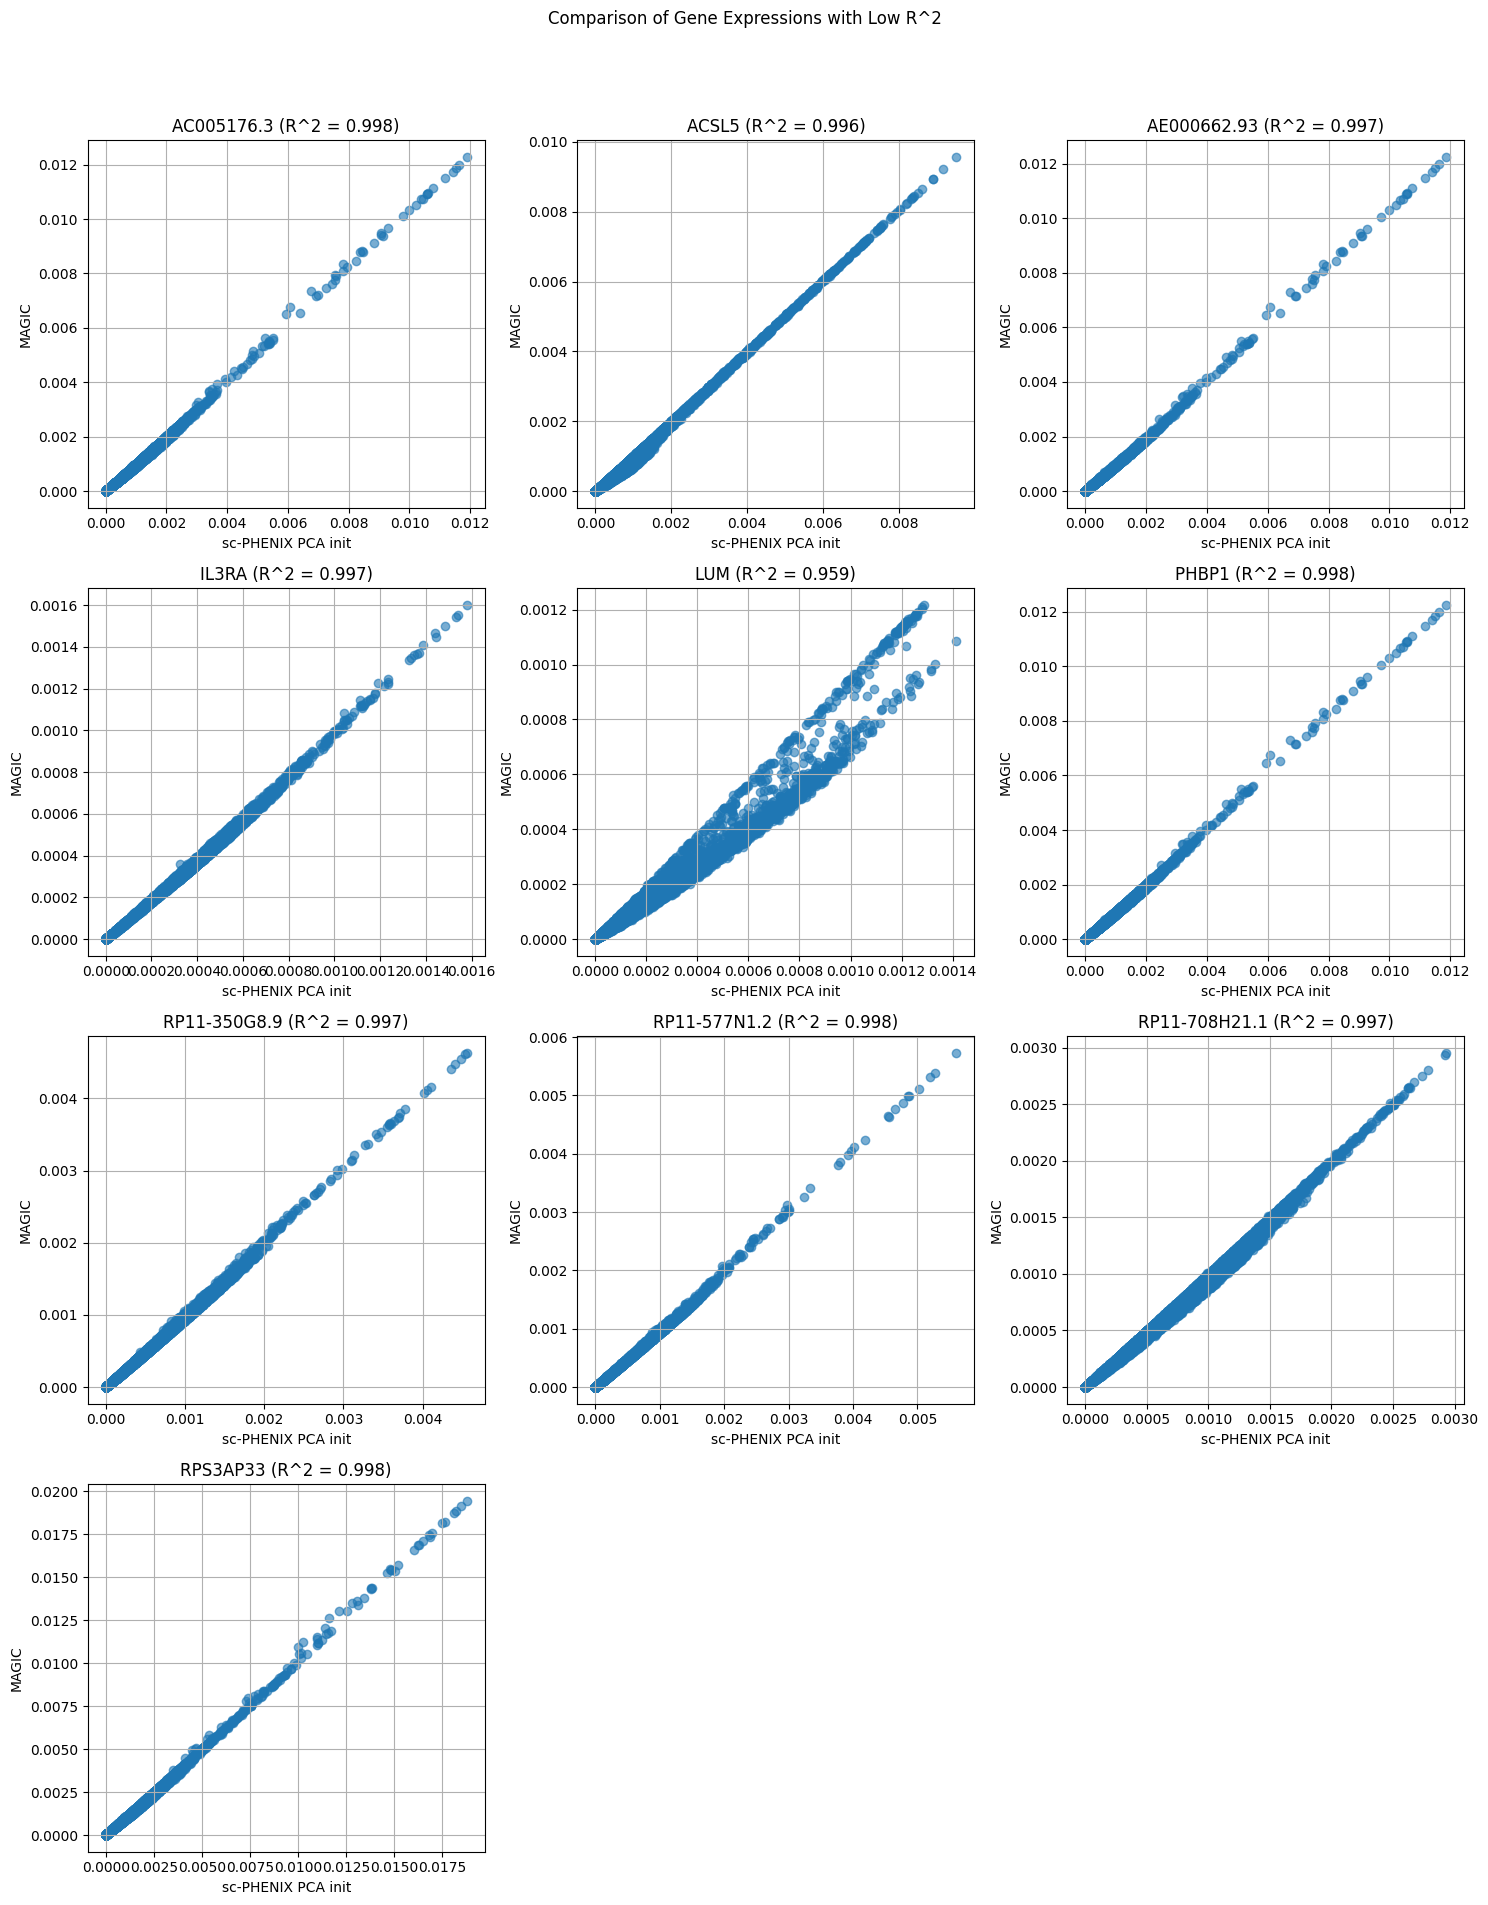

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming df_A and df_B are your DataFrames and that they have the same columns.
def plot_genes_with_low_r2(df_A, df_B, r2_threshold=0.998):
    genes_to_plot = []

    # Calculate R^2 for each gene
    for gene in df_A.columns:
        slope, intercept, r_value, p_value, std_err = linregress(df_A[gene], df_B[gene])
        r_squared = r_value ** 2
        if r_squared < r2_threshold:
            genes_to_plot.append((gene, r_squared))  # Store both the gene and its R^2

    # Determine the configuration of the subplots
    num_genes = len(genes_to_plot)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_genes + cols - 1) // cols  # Calculate the necessary number of rows

    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle('Comparison of Gene Expressions with Low R^2')

    # Flatten the axs array for easier iteration if it's multidimensional
    axs = axs.flatten()

    # Plot the genes with low R^2
    for idx, (gene, r_squared) in enumerate(genes_to_plot):
        axs[idx].scatter(df_A[gene], df_B[gene], alpha=0.6)
        axs[idx].set_title(f'{gene} (R^2 = {r_squared:.3f})')
        axs[idx].set_xlabel('sc-PHENIX PCA init')
        axs[idx].set_ylabel('MAGIC')
        axs[idx].grid(True)

    # Hide extra axes if there are any
    for ax in axs[idx+1:]:
        ax.set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout for the global title
    plt.show()

# Example of use:
plot_genes_with_low_r2(A, B)

